In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [62]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''

    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()

    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference

    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 

    return (data_msc, ref)

In [66]:
annots = loadmat('Datasets/wheat.mat')

df_wheat = pd.DataFrame(annots['wheat'])

df_wheat.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,702
2,0.354456,0.353824,0.353135,0.352451,0.351940,0.351433,0.350988,0.350728,0.350541,0.350547,...,1.195443,1.196872,1.197978,1.198916,1.199747,1.200666,1.201192,1.201228,9.19,13.07
48,0.320144,0.319596,0.318970,0.318431,0.317956,0.317534,0.317158,0.316863,0.316684,0.316615,...,1.075095,1.076730,1.078169,1.079336,1.080348,1.081057,1.081475,1.082138,11.25,16.46
84,0.314269,0.313671,0.312993,0.312420,0.311873,0.311374,0.310938,0.310560,0.310235,0.310108,...,0.975322,0.977150,0.978359,0.979811,0.980527,0.981426,0.981950,0.982360,10.98,15.55


In [67]:
X = df_wheat.iloc[:,:701].values
y = df_wheat.iloc[:,702].values

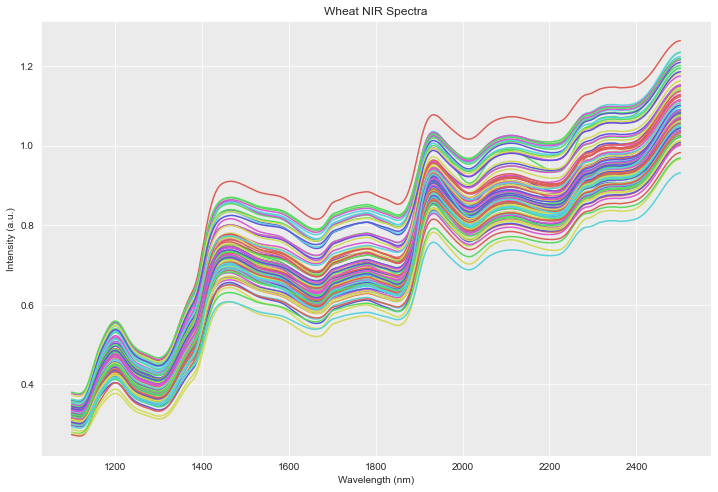

In [68]:
import warnings
warnings.filterwarnings('ignore')

wl = np.arange(1101,2502,2)
plt.figure(figsize=(12,8))

for idx, line in enumerate(X):
    sns.set_palette("hls")#, n_colors=15)

    sns.set_style('darkgrid', {'axes.facecolor': '0.92'})
    sns.lineplot(wl, line.T)

# bigger plot
plt.title('Wheat NIR Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.show()

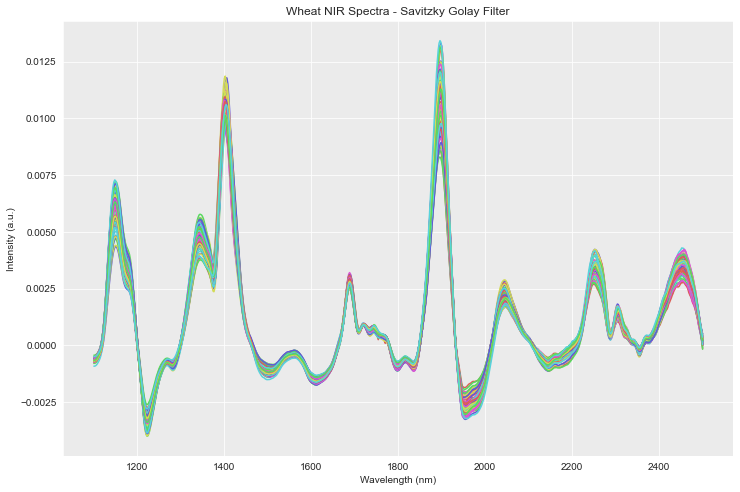

In [69]:
# Multiplicative Scatter Correction
Xc, ref = msc(X)
# First Derivative Smoothing
Xc = savgol_filter(Xc,11,3, deriv=1)
plt.figure(figsize=(12,8))

for idx, line in enumerate(Xc):
    sns.set_palette("hls")#, n_colors=15)

    sns.set_style('darkgrid', {'axes.facecolor': '0.92'})
    sns.lineplot(wl, line.T)

# bigger plot
plt.title('Wheat NIR Spectra - Savitzky Golay Filter')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.show()

In [70]:
sc = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, random_state=42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


y_train = sc.fit_transform(y_train.reshape(-1,1))
y_test = sc.transform(y_test.reshape(-1,1))

Número de componentes:  1
MSE:  0.04765140328172788
R2:  0.8300062272787541
Número de componentes:  2
MSE:  0.0098521157759268
R2:  0.9648531162842268
Número de componentes:  3
MSE:  0.0049778435672273675
R2:  0.98224181556614
Número de componentes:  4
MSE:  0.00434833199582323
R2:  0.9844875636370201
Número de componentes:  5
MSE:  0.0064346182529804695
R2:  0.977044851620045
Número de componentes:  6
MSE:  0.005356878610443972
R2:  0.9808896287982288
Número de componentes:  7
MSE:  0.009350169001502049
R2:  0.9666437839249098
Número de componentes:  8
MSE:  0.0071057049013116165
R2:  0.9746507867380897
Número de componentes:  9
MSE:  0.008582441180957351
R2:  0.9693826108985006
Número de componentes:  10
MSE:  0.007385515385358604
R2:  0.9736525781533628
Número de componentes:  11
MSE:  0.007295318022388409
R2:  0.9739743523082636
Número de componentes:  12
MSE:  0.007139426760315146
R2:  0.9745304858520635
Número de componentes:  13
MSE:  0.0074182423982757295
R2:  0.973535826326291

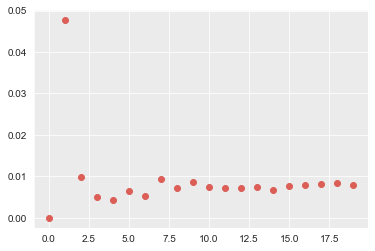

In [74]:
pls = [0]*100
mse = [0]*100

for n in range (1,100):

    pls[n] = PLSRegression(n_components=n)
    pls[n].fit(X_train, y_train)
    mse[n] = mean_squared_error(y_test, pls[n].predict(X_test))
    print ('Número de componentes: ', n)
    print ('MSE: ', mean_squared_error(y_test, pls[n].predict(X_test)))
    print ('R2: ', r2_score(y_test, pls[n].predict(X_test)))
    

plt.scatter(range(0,20), mse[:20])

In [ ]:
print(annots.keys())

dict_keys(['__header__', '__version__', '__globals__', 'information', 'm5spec', 'mp5spec', 'mp6spec', 'propvals', 'm5nbs', 'mp5nbs', 'mp6nbs', 'b', 'a', 'corn_m5spec', 'd', 'corn_mp5spec', 'c', 'X1', 'Y1', 'Num_Parametro', 'smoother', 'lambda', 'dX', 'X', 'dlambda', 'nSamp', 'nVar', 'Xorig', 'Xini', 'normalize', 'centering', 'scale', 'SizeSetCal', 'SelMethod', 'decompose', 'parametro', 'y', 'yorig', 'yini', 'wavelet', 'k', 'Lmax', 'Lmax_maior', 'ycell', 'Num_Var_Sel', 'j', 'kk', 'Ldec', 'i', 'C', 'L', 'Xdec', 'nCol', 'mXdec', 'my', 'Var_Xdec', 'Var_Xdec_perc', 'ind', 'Var_Xdec_perc_decr', 'Xdec_decr', 'Var_Xdec_perc_Cum', 'jj', 'ii', 'indc', 'Xdec_red', 'nVar_red', 'nSampVal', 'nSampCal', 'Ind', 'Xcal', 'ycal', 'Xval', 'yval', 'alpha_exit', 'alpha_entry', 'var_sel', 'yhat', 'e', 'yprev', 'ytrue', 'F_array', 'Mat_Sign', 'corn_mp5'])


In [ ]:
annots = loadmat('Datasets/corn_mp5.mat')

print(annots['information'])

['This data set consists of 80 samples of corn measured on    '
 '3 different NIR spectrometers. The wavelength range is      '
 '1100-2498nm at 2 nm intervals (700 channels). The moisture, '
 'oil, protein and starch values for each of the samples is   '
 'also included. A number of NBS glass standards were also    '
 'measured on each instrument. The data was originally taken  '
 'at Cargill. Many thanks for Mike Blackburn for letting us   '
 'distribute it.                                              '
 '                                                            '
 'The variables in this data set are described below:         '
 '   information: [20x59  char  ] This field                  '
 '        m5spec: [80x700 dataset] Spectra on instrument m5   '
 '       mp5spec: [80x700 dataset] Spectra on instrument mp5  '
 '       mp6spec: [80x700 dataset] Spectra on instrument mp6  '
 '      propvals: [80x4   dataset] Property values for samples'
 '         m5nbs: [ 3x700 dataset] NBS g